In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf


In [4]:


# Define the URL of the Django endpoint
url = "http://127.0.0.1:8000/dataset_manager/get_stock_data/"

ticker = "AAPL"
featuees = ["open", "high", "low", "close", "volume", "ema50", "ema100", "ema200",
            'pctChgclose', 'pctChgvolume', 'pctDiff+ema50_close', 'pctDiff+ema100_close',
            'pctDiff+ema200_close', 'pctDiff+smaVol10_volume', 'pctDiff+smaVol20_volume',
            'pctDiff+bb_high_close10', 'pctDiff+bb_low_close10', 'rsi10', 'rsi20',
            'opHi', 'opCl', 'pctChgClOp', 'macd_signal']
start_date = "2010-01-01"
end_date = "2020-01-01"
interval = "1d" 

params = {
    "start_date": start_date,
    "end_date": end_date,
    "interval": interval
}

url = url + ticker + "/"

response = requests.get(url, params)




In [3]:
data = response.json()

In [34]:
# convert to df 
df = pd.DataFrame(data).T
df.tail()

,open,high,low,close,volume,sma5,sma10,sma20,sma50,sma100,...,rsi5,rsi10,rsi20,rsi50,rsi100,macd,macd_signal,macd_diff,stock_k,stock_d
2024-08-12 00:00:00+00:00,534.210022,535.729980,530.950012,533.270020,42542100.0,527.544006,532.382007,541.227002,543.445602,529.975701,...,52.480494,45.792584,46.348770,51.185515,54.082880,-5.161262,-3.633855,-1.527407,51.569568,48.105885
2024-08-13 00:00:00+00:00,536.530029,542.280029,536.280029,542.039978,52333100.0,531.521997,532.386005,540.086002,543.739001,530.191301,...,66.199694,54.039724,51.226250,53.484680,55.311135,-4.137549,-3.734594,-0.402955,71.233149,57.231492
2024-08-14 00:00:00+00:00,542.849976,544.960022,540.119995,543.750000,42446900.0,536.540002,531.680005,539.426501,544.058002,530.406801,...,68.421769,55.506300,52.119665,53.916542,55.545342,-3.151932,-3.618062,0.466130,75.067279,65.956666
2024-08-15 00:00:00+00:00,549.500000,553.359985,548.880005,553.070007,60846800.0,541.023999,532.686005,539.447003,544.551602,530.725401,...,78.190039,62.711822,56.672880,56.179192,56.791992,-1.600329,-3.214515,1.614186,95.964153,80.754861
2024-08-16 00:00:00+00:00,551.419983,555.020020,551.260010,554.309998,44316100.0,545.288000,534.827002,539.713004,544.944402,531.070800,...,79.257152,63.583634,57.242327,56.469356,56.954220,-0.267531,-2.625118,2.357587,98.413360,89.814931


In [35]:
df_features = df[featuees]

<Axes: >

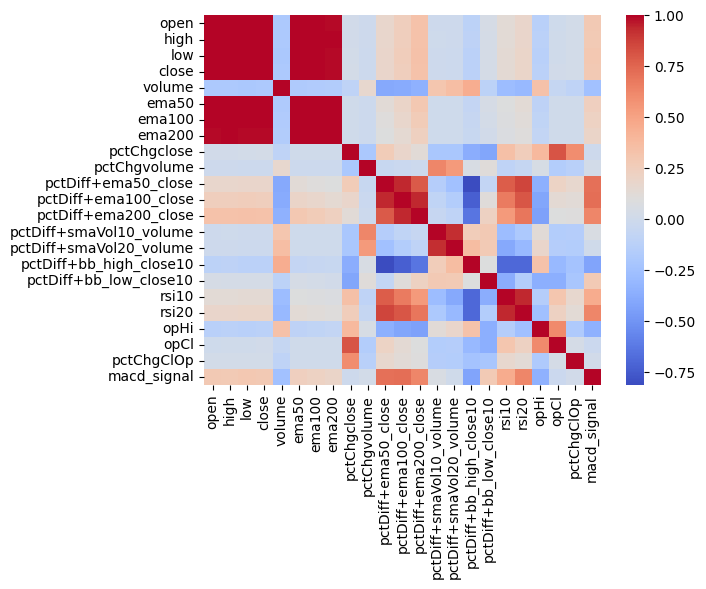

In [37]:
corr = df_features.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")

array([[<Axes: title={'center': 'open'}>,
        <Axes: title={'center': 'high'}>,
        <Axes: title={'center': 'low'}>,
        <Axes: title={'center': 'close'}>,
        <Axes: title={'center': 'volume'}>],
       [<Axes: title={'center': 'ema50'}>,
        <Axes: title={'center': 'ema100'}>,
        <Axes: title={'center': 'ema200'}>,
        <Axes: title={'center': 'pctChgclose'}>,
        <Axes: title={'center': 'pctChgvolume'}>],
       [<Axes: title={'center': 'pctDiff+ema50_close'}>,
        <Axes: title={'center': 'pctDiff+ema100_close'}>,
        <Axes: title={'center': 'pctDiff+ema200_close'}>,
        <Axes: title={'center': 'pctDiff+smaVol10_volume'}>,
        <Axes: title={'center': 'pctDiff+smaVol20_volume'}>],
       [<Axes: title={'center': 'pctDiff+bb_high_close10'}>,
        <Axes: title={'center': 'pctDiff+bb_low_close10'}>,
        <Axes: title={'center': 'rsi10'}>,
        <Axes: title={'center': 'rsi20'}>,
        <Axes: title={'center': 'opHi'}>],
       [<A

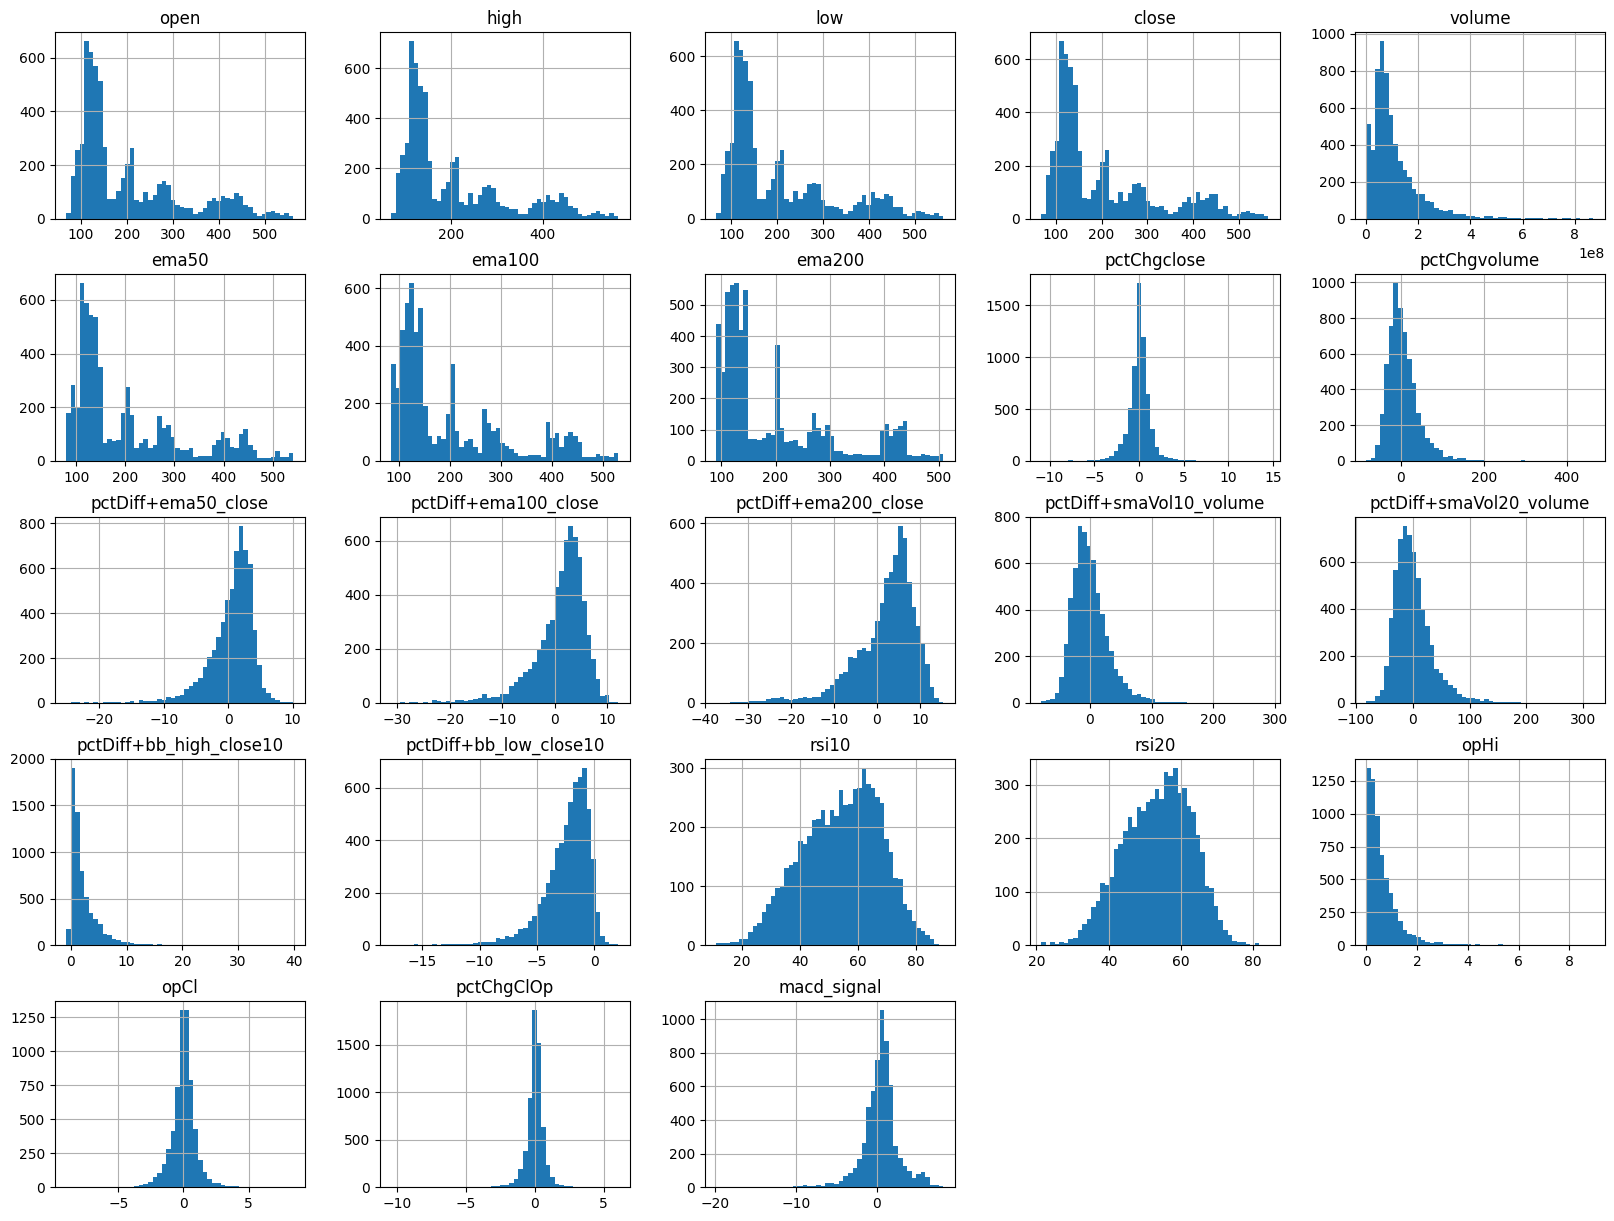

In [38]:
df_features.hist(bins=50, figsize=(20,15))

/Users/andrewpassero/miniforge3/envs/TradeLens/lib/python3.12/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


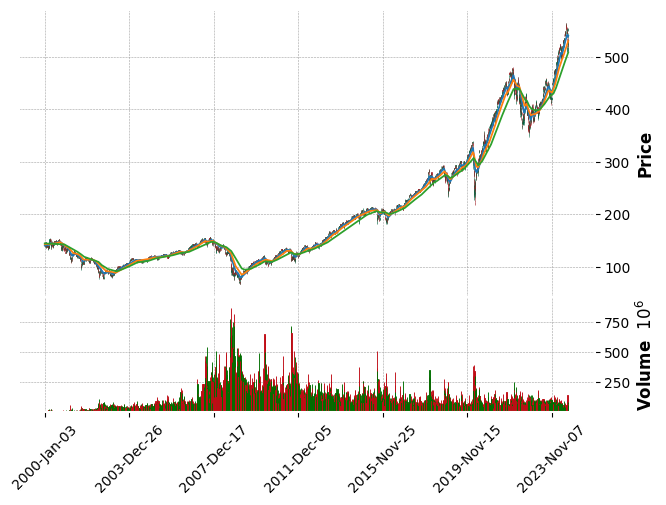

In [43]:
# plot candlestick of open, high, low, close, volume, ema50, ema100, ema200
df_candle = df[['open', 'high', 'low', 'close', 'volume', 'ema50', 'ema100', 'ema200']]
df_candle.index = pd.to_datetime(df_candle.index)
ema_plots = [mpf.make_addplot(df['ema50']), mpf.make_addplot(df['ema100']), mpf.make_addplot(df['ema200'])]
mpf.plot(df_candle, type='candle', style='charles', volume=True, addplot=ema_plots)